In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#Checking the shape of the dataset
data.shape

(144, 1)

In [3]:
#Let's check the first five rows of the dataset

data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


## Checking for the Missing Values

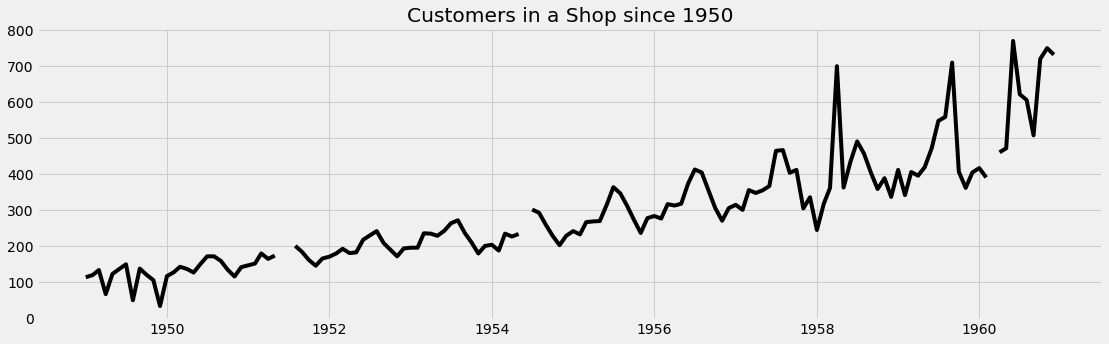

In [4]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Customers in a Shop since 1950")
plt.show()

## Linear Interpolation

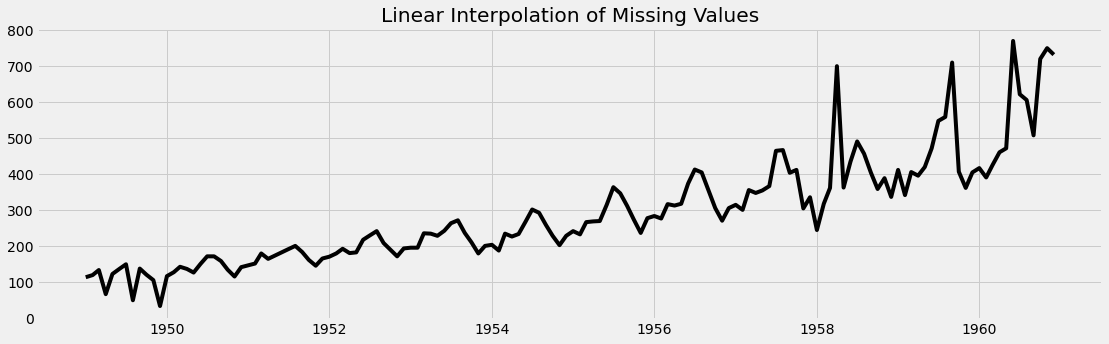

In [5]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Checking for Outliers

## Box plot
It is a standardized way of displaying the distribution of data. Any data points which are less than Q1-1.5IQR or greater than Q3+1.5IQR are considered to be outliers.

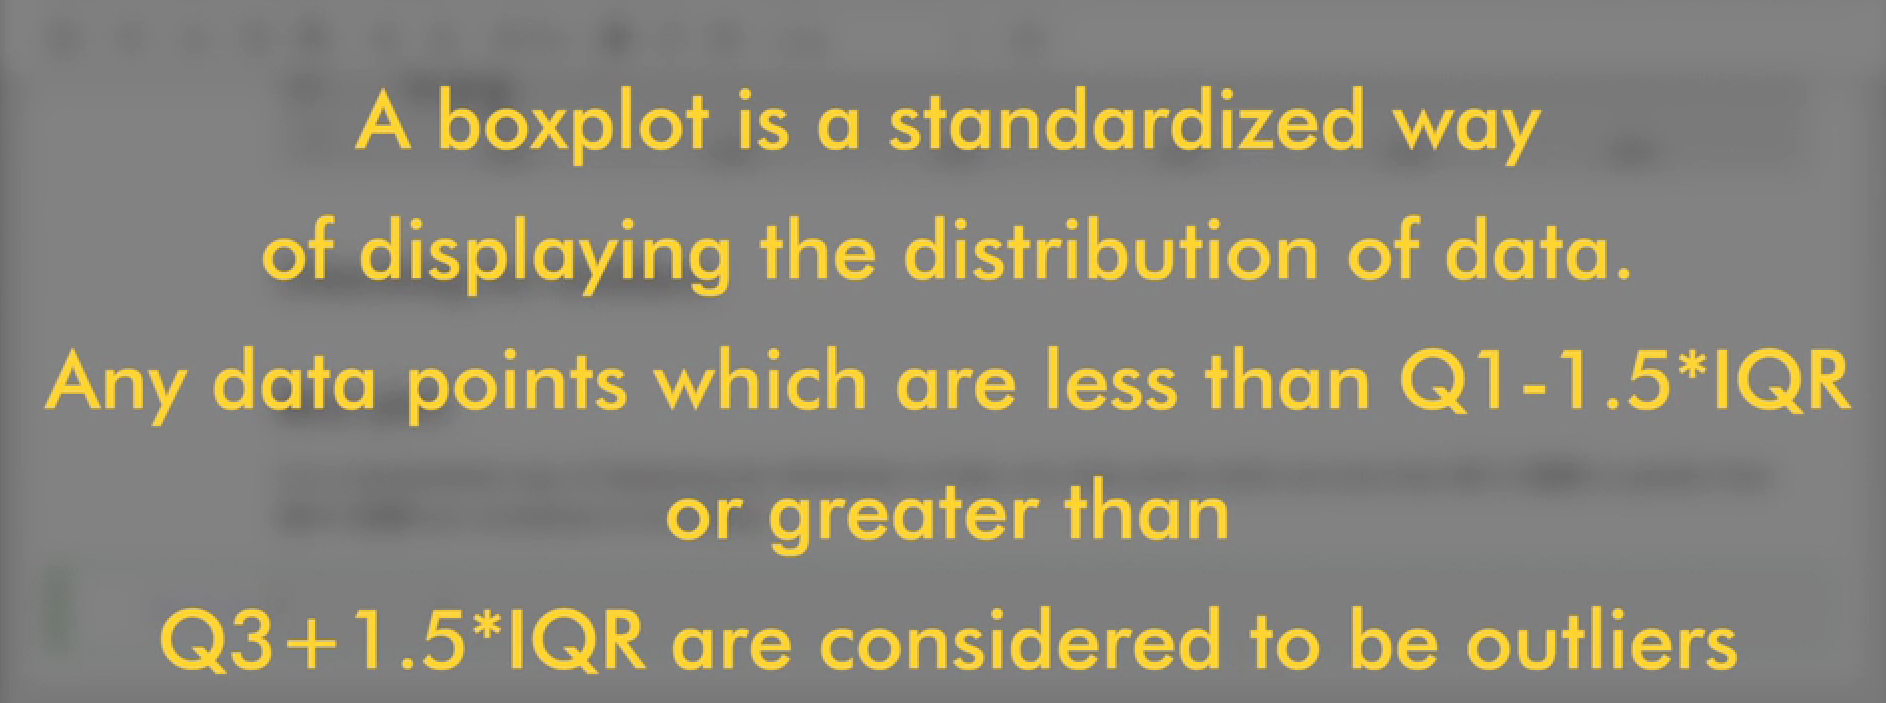

<AxesSubplot:xlabel='Customers_linear'>

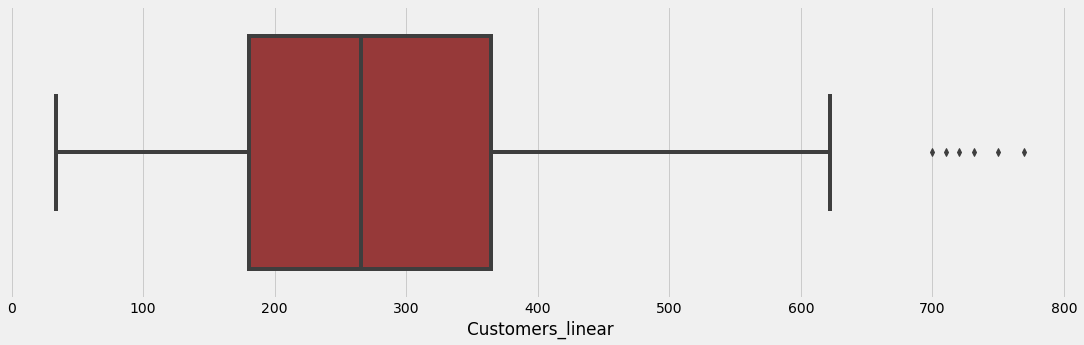

In [7]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

In [8]:
data['Customers_linear'].sort_values(ascending = False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers_linear, dtype: float64

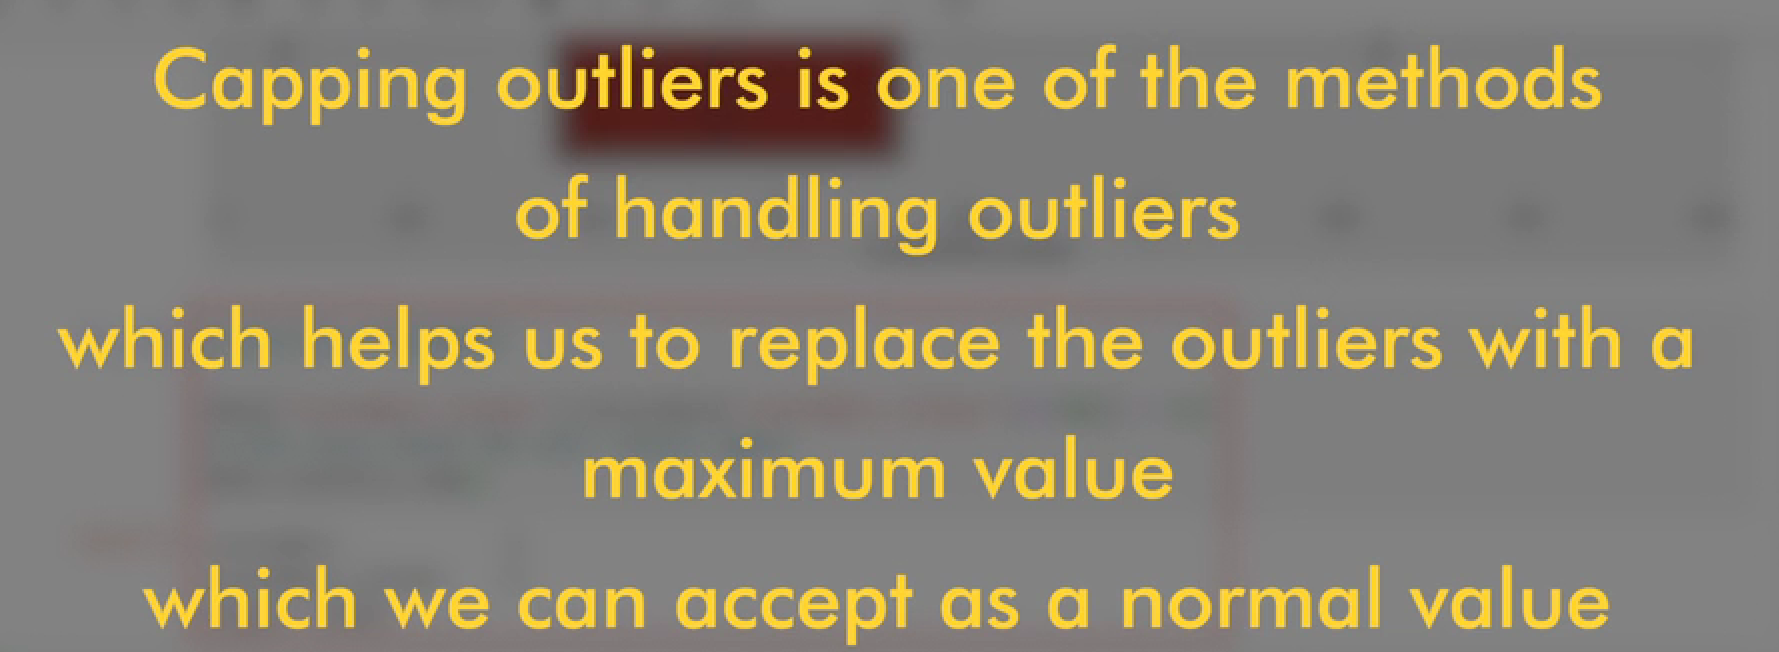

In [9]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           4
Customers_linear    0
dtype: int64

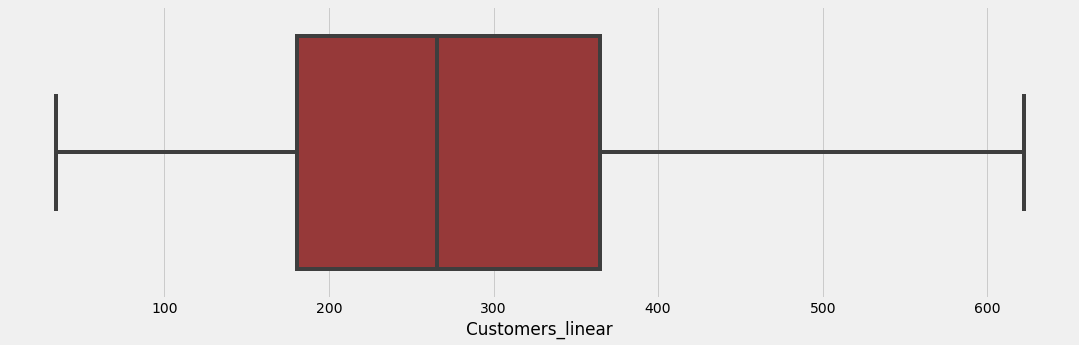

In [10]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')
plt.show()